![the mu logo](figures/logo.jpg)

# Chapter 1: Random Numbers

Uniform deviates are random numbers that lie within a specified range (typically 0 to 1), with any one number in the range just as likely as any other. They are, in other words, what you probably think “random numbers” are.

What is your definition of random numbers?


## Random events
Consider the following two systems:


![random system plot](figures/random_system.png)


In the system on the left, when the white particle strikes the black particle, we can easily predict the velocity of the white particle after the impact. It is a *determinstic* process.

In the system on the right, when the white particle enters the cloud of clack particles, it will be much more difficult to predict its velocity as it moves and it will appear to change at random. It is a *pseudo-random* process. The more and more particles added to the system, the more random it will appear to be.

There are truly random processes in nature, e.g. quantum mechanical, radioactivity, etc.
 

## Introduction

What about randomness in computing? Computers are designed to be anything but random - everything a computer does ultimately the execution of a set of instructions provided by the user/software. Many algorithms have been developed to produce sequences of pseudo-random numbers on computers. They are 'pseudo-random' as opposed to truly random because the sequence can be predicted in advance. Re-running the algorithm will produce the same sequence of numbers. Some early pseudo-random numbers were generated by an old 16-bit C compiler called TurboC. This random number generator was acceptable for interactive games (it has the virtue of being fast) but it is inadequate for serious work, with millions of random numbers. The TurboC rand() function was only capable of generating 32,768 discrete values. In a file of a million numbers most will be repeated 30 times or more

We will use a better random number generator provided within `python` environment, namely the `random` library:

In [1]:
import random as rnd

# when called with no parameters it will produce
# floating point number in the range 0.0 <= x < 1.0
x = rnd.random()
print(x)

0.39480404327264407


In [2]:
# can also define a range for the random number
# the following returns a random floating point number x such that a <= x <= b
a, b = 10, 20
x = rnd.uniform(a, b)
print(x)

10.95260404355215


In [3]:
# the previous random numbers were pulled from a uniform distrution
# but also possible to pull from others, e.g. Gaussian
x = rnd.gauss(mu=0.0, sigma=1.0)
print(x)

-0.46075703489216246


The `python` generator uses the “Mersenne Twister” algorithm which has been extensively tested. 


If we produce *n* random numbers from the previous methods, the distrubutions will become apparent 

## Activity 1
In this activity we will compare the distributions of random numbers generated by `random` in `python`

1. generate *n*=100, 100000 random numbers between 0 and 1
2. generate *n*=100, 100000 random numbers between 1 and 100
3. generate *n*=100, 100000 random numbers between -5 and +5 pulled from a Gaussian distribution with *mu*=0 and *sigma*=1
4. plot the distributions as histograms, will have to use a log scale to see both n=100 and 100000

Compare the plots. 
* Comment on the shapes of the distributions in the *n*=1e2 case. 
* What do you notice about the choice of the value of *n*?

In [4]:
# generate random numbers for part 1
n_p1 = [100, 100000]
rands_p1 = [[rnd.random() for i in range(n_p1[0])], 
            [rnd.random() for i in range(n_p1[1])]]

# generate random numbers for part 2
n_p2 = [100, 100000]
a, b = 1, 100
rands_p2 = [[rnd.uniform(a, b) for i in range(n_p2[0])], 
            [rnd.uniform(a, b) for i in range(n_p2[1])]]

# generate random numbers for part 3
n_p3 = [100, 100000]
mu, sigma = 0, 1
rands_p3 = [[rnd.gauss(mu=mu, sigma=sigma) for i in range(n_p3[0])], 
            [rnd.gauss(mu=mu, sigma=sigma) for i in range(n_p3[1])]]

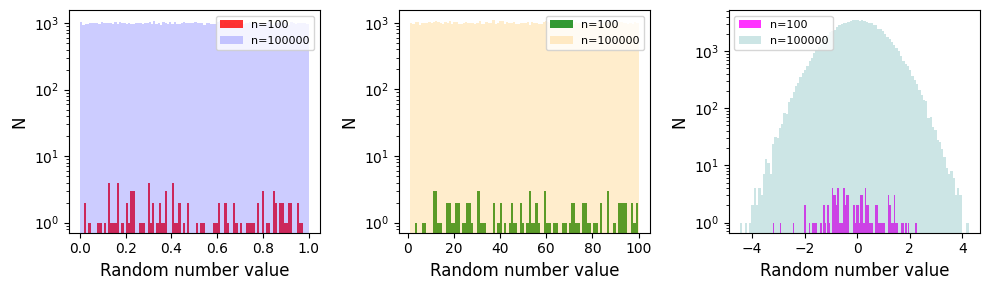

In [5]:
# import matplotlib, plot the distributions
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# part 1 distributions
axs[0].hist(rands_p1[0], bins=100, color='r', alpha=0.8, label='n={}'.format(n_p1[0]))
axs[0].hist(rands_p1[1], bins=100, color='b', alpha=0.2, label='n={}'.format(n_p1[1]))

# part 2 distributions
axs[1].hist(rands_p2[0], bins=100, color='g', alpha=0.8, label='n={}'.format(n_p2[0]))
axs[1].hist(rands_p2[1], bins=100, color='orange', alpha=0.2, label='n={}'.format(n_p2[1]))

# part 3 distributions
axs[2].hist(rands_p3[0], bins=100, color='magenta', alpha=0.8, label='n={}'.format(n_p3[0]))
axs[2].hist(rands_p3[1], bins=100, color='teal', alpha=0.2, label='n={}'.format(n_p3[1]))

# set axis/plot parameters
for a in range(len(axs)):
    axs[a].set_xlabel('Random number value', fontsize=12)
    axs[a].set_ylabel('N', fontsize=12)
    axs[a].set_yscale('log')
    axs[a].legend(fontsize=8)

plt.tight_layout(h_pad=0)
plt.show()

## Seeds

So far we have been using the default parameters of the `random` module to genererate our random numbers. But how is the generator initialised? The answer is that an integer *seed* is used. This is a critical parameter in a random number generator as if you know the seed you can predict the sequence of numbers, i.e. two successive calls to `random` with the same seed will produce the same 'random' number. So far we have been letting `random` itself provide the seed. To do this it will use either the OS random generator (if there is one available) or the system time. This means that in successive calls to `random` without providing a seed will produce different 'random' numbers.

However, we can explicitly provide this to `random`. In the example below, two sequences of 4 pseudo-random numbers are generated from the same seed. Note the sequences are identical. This reproducibility can be useful for diagnostic purposes.


In [6]:
# set a seed integer
seed = 1234

# generate two sequences of 4 from the same seed
rnd.seed(seed)
rands_seq1 = [rnd.random() for i in range(4)]
print(rands_seq1)

rnd.seed(seed)
rands_seq2 = [rnd.random() for i in range(4)]
print(rands_seq2)

[0.9664535356921388, 0.4407325991753527, 0.007491470058587191, 0.9109759624491242]
[0.9664535356921388, 0.4407325991753527, 0.007491470058587191, 0.9109759624491242]


## Activity 2
In this activity we will compare the distributions of random numbers generated by using different seeds

1. generate *n*=100, 100, 10000, 100000 random numbers between -5 and +5 pulled from a Gaussian distribution with *mu*=0 and *sigma*=1 with *seed*=12345
2. generate *n*=100, 100, 10000, 100000 random numbers between -5 and +5 pulled from a Gaussian distribution with *mu*=0 and *sigma*=1 with *seed*=54321
4. plot the distributions as histograms, will have to use a log scale to see all distributions

Compare the plots. 
* Comment on the shapes of the distributions


In [7]:
# generate random numbers for part 1
n = [100, 1000, 10000, 100000]

rands_1 = []
for nn in n:
    rnd.seed(12345)
    rands = [rnd.random() for i in range(nn)]
    rands_1.append(rands)
    
rands_2 = []
for nn in n:
    rnd.seed(54321)
    rands = [rnd.random() for i in range(nn)]
    rands_2.append(rands)

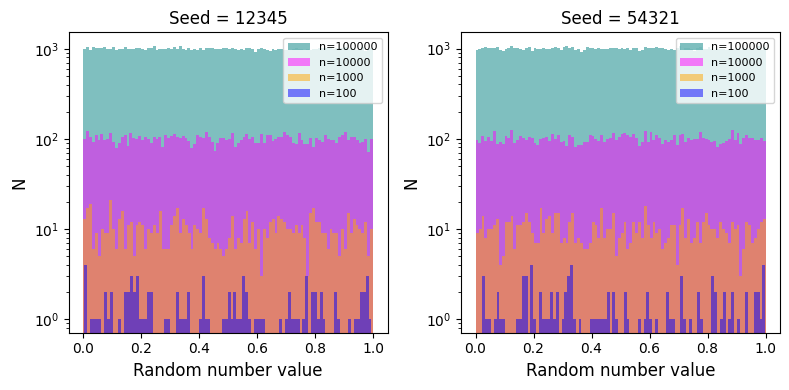

In [8]:
# plot the distributions

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].hist(rands_1[3], bins=100, color='teal', alpha=0.5, label='n={}'.format(n[3]))
axs[0].hist(rands_1[2], bins=100, color='magenta', alpha=0.5, label='n={}'.format(n[2]))
axs[0].hist(rands_1[1], bins=100, color='orange', alpha=0.5, label='n={}'.format(n[1]))
axs[0].hist(rands_1[0], bins=100, color='b', alpha=0.5, label='n={}'.format(n[0]))
axs[0].set_title('Seed = 12345', fontsize=12)

axs[1].hist(rands_2[3], bins=100, color='teal', alpha=0.5, label='n={}'.format(n[3]))
axs[1].hist(rands_2[2], bins=100, color='magenta', alpha=0.5, label='n={}'.format(n[2]))
axs[1].hist(rands_2[1], bins=100, color='orange', alpha=0.5, label='n={}'.format(n[1]))
axs[1].hist(rands_2[0], bins=100, color='b', alpha=0.5, label='n={}'.format(n[0]))
axs[1].set_title('Seed = 54321', fontsize=12)

# set axis/plot parameters
for a in range(len(axs)):
    axs[a].set_xlabel('Random number value', fontsize=12)
    axs[a].set_ylabel('N', fontsize=12)
    axs[a].set_yscale('log')
    axs[a].legend(fontsize=8)

plt.tight_layout(h_pad=0)
plt.show()

## How random is our random number generator?

If we produce $n$ random numbers by sampling a uniform distribution, we should expect that for large $n$ every bin should contain the same number of samples. For example, for $n=100000$ samples from a uniform distribution between 0 and 1, we would expect 10% of these to be in the range 0-0.1. If we bin our sample into 100000 discrete bins and since the numbers are supposed to be randomly distributed, some bins will have no events and some will have 1, 2, 3, etc.

![bins_example](figures/bins.png)

The probability of finding the number of counts per bin $c$, when the mean number of events per bin is $a$, is given by the Poisson distribution (we will study it later in the module):

$$P_{a}(c) = a^{c}e^{-a}/c!$$

In our example, the mean $a=1.0$ because we expect, on average, one event per bin. Using the equation we can predict the probability of $c$ counts per bin and, therefore, the number of bins that have $c$ by multipling the number of bins by the probability.



In [9]:
import math
import numpy as np

# define a simple function for the probability
def possion_prob(a, c):
    return a**c * math.e**(-a) / math.factorial(c)

# assess the probability for 0-8 counts per bin with a mean of 1
print('c \tP (c) \tP x 100000')
print('====== \t====== \t======')

for c in range(9):
    print("{}\t{}\t{}".format(c, np.round(possion_prob(1, c), 5), round(possion_prob(1, c)*100000)))
    
    

c 	P (c) 	P x 100000
====== 	====== 	======
0	0.36788	36788
1	0.36788	36788
2	0.18394	18394
3	0.06131	6131
4	0.01533	1533
5	0.00307	307
6	0.00051	51
7	7e-05	7
8	1e-05	1


Thus we predict that 3679 bins will have 0 counts, 3679 bins will have 1 count, 1839 will have 2 counts, 613 will have 3 counts, etc.

## Activity 3
In this activity we will compare predictions using the Poisson distribution to samples produced using the `random` function.

1. generate *n*=100000 random numbers between 0 and 1 drawn from a uniform distribution
2. predict the number of bins that contain values in the range 0-10 for a bin size of 0.00001
3. plot the predicted counts per bin and the measured counts per bin
4. Repeat for *n*=1000
 
Compare the plots. 
* Comment on the agreement between the measured and predicted values


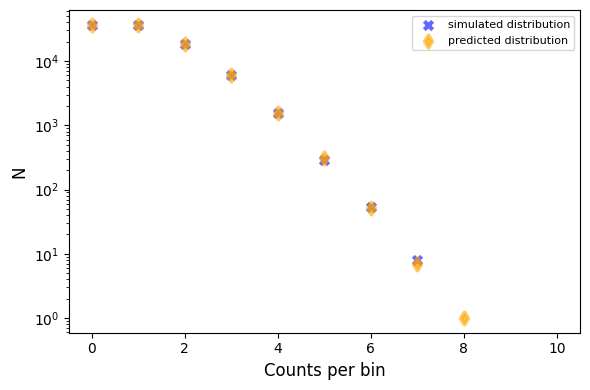

In [10]:
# part 1 - generate random number sample -----------
n = 100000
rands = [rnd.random() for i in range(n)]

# part 2 - generate random number sample -----------
# we first need to assess the mean counts per bin, which is n/no. of bins = 100000/(1/0.00001)
nbins = round(1/0.00001)
a = n/nbins

# now use the poisson_prob function to predict number of bins with $c$ counts per bin
pred_cpb = []
for c in range(11):
    pred_cpb.append(round(possion_prob(a, c)*nbins))
    
# part 3 - plot predicted and measured counts per bin -----------

# get the bin definition based on sample range and no of bins and plot
sample_bins = np.linspace(0, 1, round(nbins+1))
cpbs, _ = np.histogram(rands, bins=sample_bins)
cpb_bins = np.linspace(0, 10, 11)
counts, _ = np.histogram(cpbs, bins=cpb_bins)

fig, axs = plt.subplots(1, 1, figsize=(6, 4))

axs.scatter(range(10), counts, color='b', marker='x', linewidths=3, alpha=0.6, label='simulated distribution')

# plot predictions
axs.scatter(range(11), pred_cpb, color='orange', marker='d', linewidths=3, alpha=0.6, label='predicted distribution')

# set axis/plot parameters
axs.set_xlabel('Counts per bin', fontsize=12)
axs.set_ylabel('N', fontsize=12)
axs.set_yscale('log')
axs.legend(fontsize=8)

plt.tight_layout(h_pad=0)
plt.show()



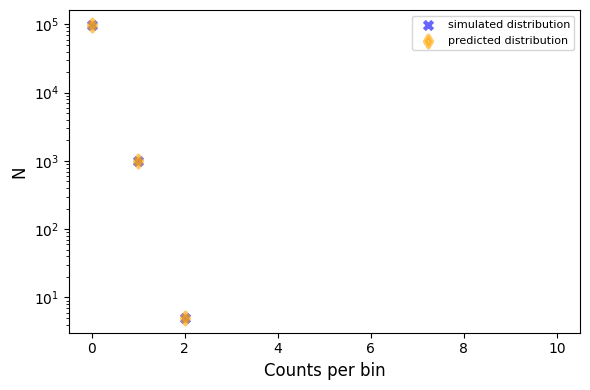

In [11]:
# part 4 - repeat for n=1000 -----------
n = 1000
rands = [rnd.random() for i in range(n)]

nbins = round(1/0.00001)
a = n/nbins

pred_cpb = []
for c in range(11):
    pred_cpb.append(round(possion_prob(a, c)*nbins))
    

# get the bin definition based on sample range and no of bins and plot
sample_bins = np.linspace(0, 1, round(nbins+1))
cpbs, _ = np.histogram(rands, bins=sample_bins)
cpb_bins = np.linspace(0, 10, 11)
counts, _ = np.histogram(cpbs, bins=cpb_bins)

fig, axs = plt.subplots(1, 1, figsize=(6, 4))

axs.scatter(range(10), counts, color='b', marker='x', linewidths=3, alpha=0.6, label='simulated distribution')
axs.scatter(range(11), pred_cpb, color='orange', marker='d', linewidths=3, alpha=0.6, label='predicted distribution')

axs.set_xlabel('Counts per bin', fontsize=12)
axs.set_ylabel('N', fontsize=12)
axs.set_yscale('log')
axs.legend(fontsize=8)

plt.tight_layout(h_pad=0)
plt.show()

The preceding activity is already a good example of the approach taken in this course. We have produced simulated data, in this case using the `random` funtions, which we used to compare to predictions of the Poisson distribution. Later in the course we will discuss distribution testing and the chi-square test. When this material is covered, you should apply the test to quantify the comparison between the Poisson distribution predictions and the outputs. 